In [517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

In [518]:
x1 = np.array([0.4, 0.8, 1, 1.2, 1.8, 1.8, 2, 2, 2.4, 2])
x2 = np.array([0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6])
y = np.array([0.7, 0.65, 0.9, 0.95, 1.1, 1.15, 1.2, 1.4, 1.55, 1.5])

In [519]:
x1.shape

(10,)

In [520]:
x2.shape

(10,)

In [521]:
y.shape

(10,)

In [522]:
m = float(len(x1))
print(m)

10.0


In [523]:
def lgd(x1, x2, y, lr, epochs):
    theta0 = 0.35
    theta1 = 0.4
    theta2 = 0.25
    cost_hist= []

    for i in range(epochs):
        pred = theta0 + theta1*x1 + theta2*x2

        cost = (1/2*m)*sum(pred-y)**2
        d0 = (1/m)*sum(pred-y)
        d1 = (1/m)*sum((pred-y)*x1)
        d2 = (1/m)*sum((pred-y)*x2)

        theta0 = theta0 - lr*d0
        theta1 = theta1 - lr*d1
        theta2 = theta2 - lr*d2
        cost_hist.append(cost)

    return theta0, theta1, theta2

In [524]:
lgd(x1, x2, y, 0.01, 1000)

(0.3135512179255028, 0.2733968245951071, 0.22098784048237394)

In [525]:
mom = np.array([58, 62, 60, 64, 67, 70])
daug = np.array([60, 60, 58, 60, 70, 72])

In [526]:
lengt = len(mom)
print(lengt)

6


In [527]:
def lgd2(x, y, lr, epochs):
    theta0 = 0.2
    theta1 = 0.3
    cost_hist = []

    for i in range(epochs):
        pred = theta0 + theta1*x

        cost = (1/(2*lengt))*(np.sum(np.square(pred-y)))
        cost_hist.append(cost)

        d0 = (1/lengt)*np.sum(pred-y)
        d1 = (1/lengt)*np.sum((pred-y)*x)

        theta0 = theta0 - d0*lr
        theta1 = theta1 - d1*lr

    return (theta0, theta1, cost_hist)

In [528]:
mom = mom.reshape(-1,1)
mom.shape

(6, 1)

In [529]:
daug.shape

(6,)

In [530]:
daug = daug.reshape(-1, 1)
daug.shape

(6, 1)

In [531]:
p1, p2, cost = lgd2(mom, daug, 0.0001, 10000)

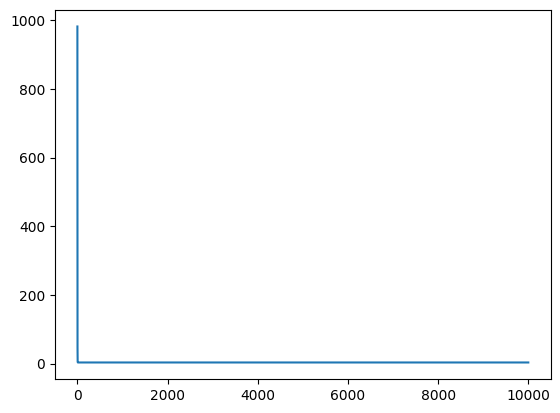

In [532]:
plt.plot(cost)

In [533]:
c = np.array(cost)

In [534]:
new = []

In [535]:
p1, p2

(0.15589324582267622, 0.9957847737140784)

In [536]:
pred_output = p2*mom+p1

In [537]:
pred_output

array([[57.91141012],
       [61.89454922],
       [59.90297967],
       [63.88611876],
       [66.87347308],
       [69.86082741]])

In [538]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(daug, pred_output))

2.6148934018264254

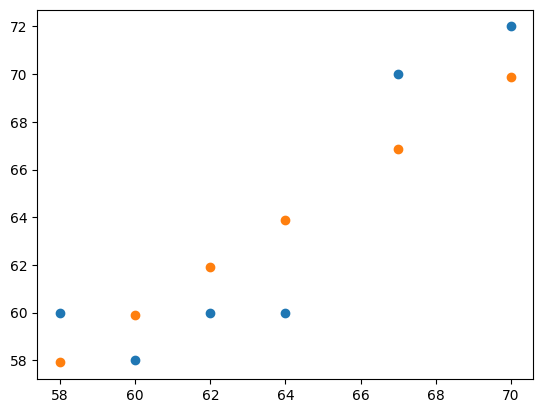

In [539]:
plt.scatter(mom, daug)
plt.scatter(mom, pred_output)

In [540]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression().fit(mom.reshape(-1, 1), daug)

In [541]:
lr.coef_

array([[1.20603015]])

In [542]:
lr.intercept_

array([-13.24958124])

In [543]:
lr.predict(mom)

array([[56.7001675 ],
       [61.52428811],
       [59.11222781],
       [63.93634841],
       [67.55443886],
       [71.17252931]])

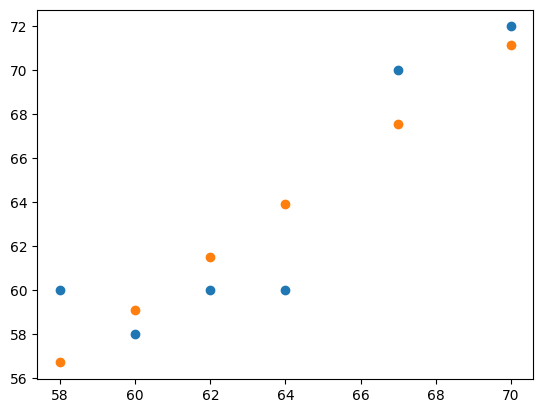

In [544]:
plt.scatter(mom, daug)
plt.scatter(mom, lr.predict(mom))

In [545]:
mean_squared_error(daug, lr.predict(mom))

6.101619207146855

In [546]:
mean_squared_error(daug, pred_output)

6.837667502915376